<a href="https://colab.research.google.com/github/rgiuffre90/Lunar-Quakes/blob/main/Robert_Giuffre_Build_Project_2_Earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import pandas as pd 
from sklearn.model_selection import train_test_split
import sys
!pip install category_encoders==2.*
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as sm
from sklearn.linear_model import Ridge
from xgboost import XGBRFRegressor
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import plotly.io as pio
pio.templates.default = "plotly_dark"
from matplotlib import style
style.use('dark_background')

# Celestial Bodies vs Earthquakes

In [ ]:
# blog post link https://medium.com/@rgiuffre90/lunar-quakes-do-celestial-bodies-play-a-role-in-earthquake-magnitude-3785da52e17b

In [ ]:
# unzip csv file
!unzip '/content/1152_2074_bundle_archive.zip'

Archive:  /content/1152_2074_bundle_archive.zip
  inflating: SolarSystemAndEarthquakes.csv  


In [ ]:
# load csv as df and checking it works correctly

df = pd.read_csv('SolarSystemAndEarthquakes.csv')

df.head()

,earthquake.time,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,day.sunrise,day.zenith,day.sunset,day.duration,night.duration,twilight.civil,twilight.nautical,twilight.astronomical,Sun.longitude,Sun.latitude,Sun.rectascension,Sun.declination,Sun.azimuth,Sun.height,Sun.speed,Sun.house,Sun.housenumber,Moon.longitude,Moon.latitude,Moon.rectascension,Moon.declination,Moon.azimuth,Moon.height,Moon.speed,Moon.house,Moon.housenumber,Mercury.longitude,Mercury.latitude,Mercury.rectascension,Mercury.declination,...,Jupiter.height,Jupiter.speed,Jupiter.house,Jupiter.housenumber,Saturn.longitude,Saturn.latitude,Saturn.rectascension,Saturn.declination,Saturn.azimuth,Saturn.height,Saturn.speed,Saturn.house,Saturn.housenumber,Uranus.longitude,Uranus.latitude,Uranus.rectascension,Uranus.declination,Uranus.azimuth,Uranus.height,Uranus.speed,Uranus.house,Uranus.housenumber,Neptune.longitude,Neptune.latitude,Neptune.rectascension,Neptune.declination,Neptune.azimuth,Neptune.height,Neptune.speed,Neptune.house,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber
0,2016-04-29T01:33:38.940Z,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,14:32:18,20:48:26,03:04:34,11:27:44,12:28:20,14:10:16/03:26:35,13:44:26/03:52:26,13:18:19/04:18:32,39.170125,0.000354,36.778368,14.548818,106.288328,-7.267641,0.972960,172.097728,6.736591,296.430023,4.217828,297.612771,-16.719596,290.884648,-69.963160,17.946449,71.127678,3.370923,53.592961,2.388430,50.572216,20.979746,...,62.122859,-0.034394,297.688708,10.922957,255.458818,1.804580,254.423097,-20.847349,288.244965,-29.010804,-0.050589,29.924834,1.997494,21.535101,-0.591519,20.126982,7.845672,103.662723,-24.732606,0.054950,154.005108,6.133504,341.480811,-0.813171,343.227999,-8.008959,92.822899,-64.151005,0.023638,115.671924,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499
1,2016-04-28T19:33:24.420Z,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,21:04:55,02:48:30,08:32:05,12:32:50,11:23:14,20:42:31/08:54:28,20:16:39/09:20:20,19:50:56/09:46:03,38.931877,0.000048,36.545231,14.472521,252.838413,6.583704,0.970095,352.513586,12.750453,292.522651,4.408984,293.565659,-17.202394,83.737440,66.632132,7.916520,246.935264,9.231176,53.605240,2.423238,50.575504,21.016525,...,-62.046295,-0.030394,116.660701,4.888690,255.471366,1.804289,254.436407,-20.848978,74.843380,29.943406,-0.052707,210.649115,8.021637,21.521569,-0.591568,20.114329,7.840572,253.522869,23.991351,0.055444,333.783924,12.126131,341.475108,-0.813096,343.222645,-8.011062,254.912125,64.024787,0.023685,294.644173,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618
2,2016-04-20T08:33:47.600Z,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,13:12:54,19:16:28,01:20:02,11:52:52,12:3:12,12:51:20/01:41:36,12:26:10/02:06:46,12:00:58/02:31:58,30.695833,-0.000966,28.577012,11.712719,254.012552,-40.258031,0.986069,41.405464,2.380182,189.682547,1.345640,189.426436,-2.597789,86.931740,22.269301,9.801234,202.304372,7.743479,50.275084,2.845783,47.023208,20.552056,...,-1.362386,-0.057990,178.623859,6.954129,255.862354,1.795031,254.851274,-20.899437,5.703681,68.352618,-0.042190,267.744827,9.924828,21.048081,-0.591414,19.671106,7.663670,260.532947,-32.141983,0.057240,32.516090,2.083870,341.259478,-0.808713,343.019606,-8.089094,278.153347,3.950142,0.027573,356.005615,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679
3,2016-04-16T23:58:37.280Z,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,13:08:52,19:12:25,01:15:58,11:52:54,12:3:10,12:47:17/01:3

In [ ]:
# checking the range of data for magnitude (min)
df['earthquake.mag'].min()

6.1

In [ ]:
# checking the range of data for magnitude (max)
df['earthquake.mag'].max()

9.1

In [ ]:
# checking if there are any NaNs

df['earthquake.mag'].isnull().sum()

0

In [ ]:
# Setting target (magnitude)

y = df['earthquake.mag']
X = df.drop('earthquake.mag', axis=1)

In [ ]:
# running train/test/split on the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.02, random_state=42)

In [ ]:
# linear regression model with magnitude as the target
# using OHE for categorical data, SelectKBest to reduce cardonality
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(k=25),
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['earthquake.time', 'earthquake.place',
                                     'MoonPhase.dynamic', 'day.sunrise',
                                     'day.zenith', 'day.sunset', 'day.duration',
                                     'night.duration', 'twilight.civil',
                                     'twilight.nautical',
                                     'twilight.astronomical'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_name...
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sele

In [ ]:
# checking metrics of the model-MAE
print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train)))
print('Validation MAE:', mean_absolute_error(y_val, model.predict(X_val)))

Training MAE: 0.30996644105859666
Validation MAE: 0.3584222698159385


In [ ]:
# checking metrics of the model-RMSE
print('Training RMSE:', mean_squared_error(y_train, model.predict(X_train), squared=False))
print('Validation RMSE:', mean_squared_error(y_val, model.predict(X_val), squared=False))

Training RMSE: 0.40756190879594956
Validation RMSE: 0.4788107965711938


In [ ]:
# checking metrics of the model-R2
print('Training R2:', model.score(X_train, y_train))
print('Validation R2:', model.score(X_val, y_val))

Training R2: 0.03289683987338554
Validation R2: -0.013005672969494064


In [ ]:
# Second Model - Ridge Regression
model2 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(k=25),
    Ridge(alpha=.02, normalize=True)
)

model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['earthquake.time', 'earthquake.place',
                                     'MoonPhase.dynamic', 'day.sunrise',
                                     'day.zenith', 'day.sunset', 'day.duration',
                                     'night.duration', 'twilight.civil',
                                     'twilight.nautical',
                                     'twilight.astronomical'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_name...
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sele

In [ ]:
# Checking baseline MAE to compare
y_pred = [y_train.mean()] * len(X_train)
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Baseline MAE: 0.31247020502134554


In [ ]:
# checking metrics of model 2 Ridge - MAE
print('Training MAE:', mean_absolute_error(y_train, model2.predict(X_train)))
print('Validation MAE:', mean_absolute_error(y_val, model2.predict(X_val)))

Training MAE: 0.3093028732025047
Validation MAE: 0.3584312659254648


In [ ]:
# checking metrics of model 2 Ridge - R2
print('Training R2:', model2.score(X_train, y_train))
print('Validation R2:', model2.score(X_val, y_val))

Training R2: 0.036338439764090125
Validation R2: -0.012978556069712877


In [ ]:
# removing categorical features so that I can run a XGB model
solar_clean = df.drop(['earthquake.time', 'earthquake.place', 'MoonPhase.dynamic', 'day.sunrise', 
                       'day.zenith', 'day.sunset', 'day.duration', 'night.duration', 'twilight.civil',
                       'twilight.nautical', 'twilight.astronomical', 'earthquake.mag'], axis=1)

In [ ]:
# cleaned target 
y3 = df['earthquake.mag']
X3 = solar_clean

In [ ]:
# new split for cleaned data
X3_train, X3_val, y3_train, y3_val = train_test_split(X3, y3, test_size=.02, random_state=42)

In [ ]:
# Model 3 - XGBFRegressor
model_gb = XGBRFRegressor(n_estimators=50, n_jobs=10)
model_gb.fit(X3_train, y3_train);

[00:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Baseline to compare metrics
y_pred = [y3_train.mean()] * len(X3_train)
print('Baseline MAE:', mean_absolute_error(y3_train, y_pred))

Baseline MAE: 0.31247020502134554


In [ ]:
# Checking metrics for XGBRegressor Model - MAE
print('Training MAE:', mean_absolute_error(y3_train, model_gb.predict(X3_train)))
print('Validation MAE:', mean_absolute_error(y3_val, model_gb.predict(X3_val)))

Training MAE: 0.3121233606165008
Validation MAE: 0.35856029954675134


In [ ]:
# Checking coefficients to see if i can adjust my features in the model

coefficients = np.round(model.named_steps['linearregression'].coef_, 2)
list(zip(X_train.columns, coefficients))

[('earthquake.time', 1715093333223.18),
 ('earthquake.latitude', -805538881763.74),
 ('earthquake.longitude', 327629910487.15),
 ('earthquake.place', 1967658369044.52),
 ('MoonPhase.dynamic', 147229374359.2),
 ('MoonPhase.value', 67830273274.13),
 ('MoonPhase.total', 278344024733.75),
 ('MoonPhase.percent', 4195801727699.63),
 ('MoonPhase.illumination', 219436502468.19),
 ('day.sunrise', -100831038416.66),
 ('day.zenith', -67351133297.94),
 ('day.sunset', 156950630683.68),
 ('day.duration', -574186173761.05),
 ('night.duration', -2067878582086.56),
 ('twilight.civil', 219436502468.19),
 ('twilight.nautical', 169209972498.68),
 ('twilight.astronomical', -67351133297.94),
 ('Sun.longitude', -31054377784.27),
 ('Sun.latitude', -574186173761.05),
 ('Sun.rectascension', -2127923145613.0),
 ('Sun.declination', 219436502468.19),
 ('Sun.azimuth', -68378934081.98),
 ('Sun.height', -260757917165.4),
 ('Sun.speed', -2371898646677.68),
 ('Sun.house', -566720985701.06)]

In [ ]:
# New filtering based on coefficient importance above 

df_clean = df[['earthquake.longitude', 'earthquake.place', 'MoonPhase.dynamic',
               'MoonPhase.value', 'MoonPhase.total', 'MoonPhase.percent', 'MoonPhase.illumination',
               'day.sunset', 'twilight.civil', 'twilight.nautical', 'Sun.declination', 'earthquake.mag']]

In [ ]:
# New target based on the above

y6 = df_clean['earthquake.mag']
X6 = df_clean.drop('earthquake.mag', axis=1)

In [ ]:
# train/test/split of new filtering

X6_train, X6_val, y6_train, y6_val = train_test_split(X6, y6, test_size=.02, random_state=42)

In [ ]:
# new linear regression model with features filtered

model6 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(k=25),
    LinearRegression()
)

model6.fit(X6_train, y6_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['earthquake.place', 'MoonPhase.dynamic',
                                     'day.sunset', 'twilight.civil',
                                     'twilight.nautical'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selectkbest',
                 SelectKBest(k=25,
                             score_func=<function f_classif at 0x7f5ea5678b70>)),
                ('linearregression',
   

In [ ]:
# Checking Metrics of new model - MAE

print('Training MAE:', mean_absolute_error(y6_train, model6.predict(X6_train)))
print('Validation MAE:', mean_absolute_error(y6_val, model6.predict(X6_val)))

Training MAE: 0.3082362317528129
Validation MAE: 0.3582549783575996


In [ ]:
# Checking Metrics of new model - R2

print('Training R2:', model6.score(X6_train, y6_train))
print('Validation R2:', model6.score(X6_val, y6_val))

Training R2: 0.052369011495319806
Validation R2: -0.013546434889188053


In [ ]:
# creating a model to check permutation importance

column = 'earthquake.mag'

model_with = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBRFRegressor(n_estimators=20, n_jobs=-1)
)

model_with.fit(X3_train, y3_train)

print(f'Validation Accuracy with {column} included:',
      model_with.score(X3_val, y3_val))

[00:39:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation Accuracy with earthquake.mag included: -0.012865113494945346


In [ ]:
perm_imp = permutation_importance(model_with, X3_val, y3_val, n_jobs=-1)

In [ ]:
perm_imp.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [ ]:
# Setting up permutation importance plot
data = {'importances_mean' : perm_imp['importances_mean'],
        'importances_std' : perm_imp['importances_std']}

df_perm = pd.DataFrame(data, index=X3_val.columns)
df_perm.sort_values('importances_mean', ascending=True, inplace=True)

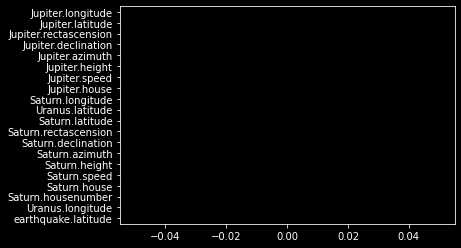

In [ ]:
# displaying perm plot

df_perm.head(20).importances_mean.plot(kind='barh')

In [ ]:
# nothing is showing importance in the plot, abandoning models and creating 
# a new feature to model off of

In [ ]:
# correcting to datetime format
df['earthquake.time'] = pd.to_datetime(df['earthquake.time'], infer_datetime_format=True)

In [ ]:
df.head()

,earthquake.time,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,day.sunrise,day.zenith,day.sunset,day.duration,night.duration,twilight.civil,twilight.nautical,twilight.astronomical,Sun.longitude,Sun.latitude,Sun.rectascension,Sun.declination,Sun.azimuth,Sun.height,Sun.speed,Sun.house,Sun.housenumber,Moon.longitude,Moon.latitude,Moon.rectascension,Moon.declination,Moon.azimuth,Moon.height,Moon.speed,Moon.house,Moon.housenumber,Mercury.longitude,Mercury.latitude,Mercury.rectascension,Mercury.declination,...,Jupiter.height,Jupiter.speed,Jupiter.house,Jupiter.housenumber,Saturn.longitude,Saturn.latitude,Saturn.rectascension,Saturn.declination,Saturn.azimuth,Saturn.height,Saturn.speed,Saturn.house,Saturn.housenumber,Uranus.longitude,Uranus.latitude,Uranus.rectascension,Uranus.declination,Uranus.azimuth,Uranus.height,Uranus.speed,Uranus.house,Uranus.housenumber,Neptune.longitude,Neptune.latitude,Neptune.rectascension,Neptune.declination,Neptune.azimuth,Neptune.height,Neptune.speed,Neptune.house,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber
0,2016-04-29 01:33:38.940000+00:00,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,14:32:18,20:48:26,03:04:34,11:27:44,12:28:20,14:10:16/03:26:35,13:44:26/03:52:26,13:18:19/04:18:32,39.170125,0.000354,36.778368,14.548818,106.288328,-7.267641,0.972960,172.097728,6.736591,296.430023,4.217828,297.612771,-16.719596,290.884648,-69.963160,17.946449,71.127678,3.370923,53.592961,2.388430,50.572216,20.979746,...,62.122859,-0.034394,297.688708,10.922957,255.458818,1.804580,254.423097,-20.847349,288.244965,-29.010804,-0.050589,29.924834,1.997494,21.535101,-0.591519,20.126982,7.845672,103.662723,-24.732606,0.054950,154.005108,6.133504,341.480811,-0.813171,343.227999,-8.008959,92.822899,-64.151005,0.023638,115.671924,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499
1,2016-04-28 19:33:24.420000+00:00,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,21:04:55,02:48:30,08:32:05,12:32:50,11:23:14,20:42:31/08:54:28,20:16:39/09:20:20,19:50:56/09:46:03,38.931877,0.000048,36.545231,14.472521,252.838413,6.583704,0.970095,352.513586,12.750453,292.522651,4.408984,293.565659,-17.202394,83.737440,66.632132,7.916520,246.935264,9.231176,53.605240,2.423238,50.575504,21.016525,...,-62.046295,-0.030394,116.660701,4.888690,255.471366,1.804289,254.436407,-20.848978,74.843380,29.943406,-0.052707,210.649115,8.021637,21.521569,-0.591568,20.114329,7.840572,253.522869,23.991351,0.055444,333.783924,12.126131,341.475108,-0.813096,343.222645,-8.011062,254.912125,64.024787,0.023685,294.644173,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618
2,2016-04-20 08:33:47.600000+00:00,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,13:12:54,19:16:28,01:20:02,11:52:52,12:3:12,12:51:20/01:41:36,12:26:10/02:06:46,12:00:58/02:31:58,30.695833,-0.000966,28.577012,11.712719,254.012552,-40.258031,0.986069,41.405464,2.380182,189.682547,1.345640,189.426436,-2.597789,86.931740,22.269301,9.801234,202.304372,7.743479,50.275084,2.845783,47.023208,20.552056,...,-1.362386,-0.057990,178.623859,6.954129,255.862354,1.795031,254.851274,-20.899437,5.703681,68.352618,-0.042190,267.744827,9.924828,21.048081,-0.591414,19.671106,7.663670,260.532947,-32.141983,0.057240,32.516090,2.083870,341.259478,-0.808713,343.019606,-8.089094,278.153347,3.950142,0.027573,356.005615,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679
3,2016-04-16 23:58:37.280000+00:00,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,13:08:52,19:12:25,01:15:5

In [ ]:
# creating a copy of the data so i can create second set of models
df2 = df.copy()

In [ ]:
# feature engineering- seperating mags into bins of their classes
# classes are 6-6.9, 7-7.9, 8 and above
df2['mag.bins'] = pd.cut(x=df['earthquake.mag'], bins=[6, 6.9, 7.9, 10])

In [ ]:
# double checking the bins were created
df2

,earthquake.time,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,day.sunrise,day.zenith,day.sunset,day.duration,night.duration,twilight.civil,twilight.nautical,twilight.astronomical,Sun.longitude,Sun.latitude,Sun.rectascension,Sun.declination,Sun.azimuth,Sun.height,Sun.speed,Sun.house,Sun.housenumber,Moon.longitude,Moon.latitude,Moon.rectascension,Moon.declination,Moon.azimuth,Moon.height,Moon.speed,Moon.house,Moon.housenumber,Mercury.longitude,Mercury.latitude,Mercury.rectascension,Mercury.declination,...,Jupiter.speed,Jupiter.house,Jupiter.housenumber,Saturn.longitude,Saturn.latitude,Saturn.rectascension,Saturn.declination,Saturn.azimuth,Saturn.height,Saturn.speed,Saturn.house,Saturn.housenumber,Uranus.longitude,Uranus.latitude,Uranus.rectascension,Uranus.declination,Uranus.azimuth,Uranus.height,Uranus.speed,Uranus.house,Uranus.housenumber,Neptune.longitude,Neptune.latitude,Neptune.rectascension,Neptune.declination,Neptune.azimuth,Neptune.height,Neptune.speed,Neptune.house,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber,mag.bins
0,2016-04-29 01:33:38.940000+00:00,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,14:32:18,20:48:26,03:04:34,11:27:44,12:28:20,14:10:16/03:26:35,13:44:26/03:52:26,13:18:19/04:18:32,39.170125,0.000354,36.778368,14.548818,106.288328,-7.267641,0.972960,172.097728,6.736591,296.430023,4.217828,297.612771,-16.719596,290.884648,-69.963160,17.946449,71.127678,3.370923,53.592961,2.388430,50.572216,20.979746,...,-0.034394,297.688708,10.922957,255.458818,1.804580,254.423097,-20.847349,288.244965,-29.010804,-0.050589,29.924834,1.997494,21.535101,-0.591519,20.126982,7.845672,103.662723,-24.732606,0.054950,154.005108,6.133504,341.480811,-0.813171,343.227999,-8.008959,92.822899,-64.151005,0.023638,115.671924,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499,"(6.0, 6.9]"
1,2016-04-28 19:33:24.420000+00:00,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,21:04:55,02:48:30,08:32:05,12:32:50,11:23:14,20:42:31/08:54:28,20:16:39/09:20:20,19:50:56/09:46:03,38.931877,0.000048,36.545231,14.472521,252.838413,6.583704,0.970095,352.513586,12.750453,292.522651,4.408984,293.565659,-17.202394,83.737440,66.632132,7.916520,246.935264,9.231176,53.605240,2.423238,50.575504,21.016525,...,-0.030394,116.660701,4.888690,255.471366,1.804289,254.436407,-20.848978,74.843380,29.943406,-0.052707,210.649115,8.021637,21.521569,-0.591568,20.114329,7.840572,253.522869,23.991351,0.055444,333.783924,12.126131,341.475108,-0.813096,343.222645,-8.011062,254.912125,64.024787,0.023685,294.644173,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618,"(6.9, 7.9]"
2,2016-04-20 08:33:47.600000+00:00,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,13:12:54,19:16:28,01:20:02,11:52:52,12:3:12,12:51:20/01:41:36,12:26:10/02:06:46,12:00:58/02:31:58,30.695833,-0.000966,28.577012,11.712719,254.012552,-40.258031,0.986069,41.405464,2.380182,189.682547,1.345640,189.426436,-2.597789,86.931740,22.269301,9.801234,202.304372,7.743479,50.275084,2.845783,47.023208,20.552056,...,-0.057990,178.623859,6.954129,255.862354,1.795031,254.851274,-20.899437,5.703681,68.352618,-0.042190,267.744827,9.924828,21.048081,-0.591414,19.671106,7.663670,260.532947,-32.141983,0.057240,32.516090,2.083870,341.259478,-0.808713,343.019606,-8.089094,278.153347,3.950142,0.027573,356.005615,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679,"(6.0, 6.9]"
3,2016-04-16 23:58:37.280000+00:00,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,13:08:52,19:12:25,01:15

In [ ]:
# new feature - strength classes 
df2['quake.stregnth'] = df2['mag.bins'] = pd.cut(x=df['earthquake.mag'], 
                                                 bins=[6, 6.9, 7.9, 10], 
                                                 labels=['Strong', 'Major', 
                                                         'Great']
                                                 )

In [ ]:
# checking that the new feature made it in the data
df2

,earthquake.time,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,day.sunrise,day.zenith,day.sunset,day.duration,night.duration,twilight.civil,twilight.nautical,twilight.astronomical,Sun.longitude,Sun.latitude,Sun.rectascension,Sun.declination,Sun.azimuth,Sun.height,Sun.speed,Sun.house,Sun.housenumber,Moon.longitude,Moon.latitude,Moon.rectascension,Moon.declination,Moon.azimuth,Moon.height,Moon.speed,Moon.house,Moon.housenumber,Mercury.longitude,Mercury.latitude,Mercury.rectascension,Mercury.declination,...,Jupiter.house,Jupiter.housenumber,Saturn.longitude,Saturn.latitude,Saturn.rectascension,Saturn.declination,Saturn.azimuth,Saturn.height,Saturn.speed,Saturn.house,Saturn.housenumber,Uranus.longitude,Uranus.latitude,Uranus.rectascension,Uranus.declination,Uranus.azimuth,Uranus.height,Uranus.speed,Uranus.house,Uranus.housenumber,Neptune.longitude,Neptune.latitude,Neptune.rectascension,Neptune.declination,Neptune.azimuth,Neptune.height,Neptune.speed,Neptune.house,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber,mag.bins,quake.stregnth
0,2016-04-29 01:33:38.940000+00:00,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,14:32:18,20:48:26,03:04:34,11:27:44,12:28:20,14:10:16/03:26:35,13:44:26/03:52:26,13:18:19/04:18:32,39.170125,0.000354,36.778368,14.548818,106.288328,-7.267641,0.972960,172.097728,6.736591,296.430023,4.217828,297.612771,-16.719596,290.884648,-69.963160,17.946449,71.127678,3.370923,53.592961,2.388430,50.572216,20.979746,...,297.688708,10.922957,255.458818,1.804580,254.423097,-20.847349,288.244965,-29.010804,-0.050589,29.924834,1.997494,21.535101,-0.591519,20.126982,7.845672,103.662723,-24.732606,0.054950,154.005108,6.133504,341.480811,-0.813171,343.227999,-8.008959,92.822899,-64.151005,0.023638,115.671924,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499,Strong,Strong
1,2016-04-28 19:33:24.420000+00:00,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,21:04:55,02:48:30,08:32:05,12:32:50,11:23:14,20:42:31/08:54:28,20:16:39/09:20:20,19:50:56/09:46:03,38.931877,0.000048,36.545231,14.472521,252.838413,6.583704,0.970095,352.513586,12.750453,292.522651,4.408984,293.565659,-17.202394,83.737440,66.632132,7.916520,246.935264,9.231176,53.605240,2.423238,50.575504,21.016525,...,116.660701,4.888690,255.471366,1.804289,254.436407,-20.848978,74.843380,29.943406,-0.052707,210.649115,8.021637,21.521569,-0.591568,20.114329,7.840572,253.522869,23.991351,0.055444,333.783924,12.126131,341.475108,-0.813096,343.222645,-8.011062,254.912125,64.024787,0.023685,294.644173,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618,Major,Major
2,2016-04-20 08:33:47.600000+00:00,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,13:12:54,19:16:28,01:20:02,11:52:52,12:3:12,12:51:20/01:41:36,12:26:10/02:06:46,12:00:58/02:31:58,30.695833,-0.000966,28.577012,11.712719,254.012552,-40.258031,0.986069,41.405464,2.380182,189.682547,1.345640,189.426436,-2.597789,86.931740,22.269301,9.801234,202.304372,7.743479,50.275084,2.845783,47.023208,20.552056,...,178.623859,6.954129,255.862354,1.795031,254.851274,-20.899437,5.703681,68.352618,-0.042190,267.744827,9.924828,21.048081,-0.591414,19.671106,7.663670,260.532947,-32.141983,0.057240,32.516090,2.083870,341.259478,-0.808713,343.019606,-8.089094,278.153347,3.950142,0.027573,356.005615,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679,Strong,Strong
3,2016-04-16 23:58:37.280000+00:00,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,13:08:52,19:12:25,01:15:58,11:52:54,12:3:10,12:47:1

In [ ]:
# setting new target and features to use

y= df2['quake.stregnth']
X= df2[['earthquake.latitude', 'earthquake.longitude',
        'MoonPhase.dynamic', 'MoonPhase.value', 'MoonPhase.total',
        'MoonPhase.percent', 'Sun.longitude','Sun.latitude', 'Sun.rectascension', 
        'Sun.declination', 'Sun.azimuth','Sun.height', 'Sun.speed', 
        'Moon.longitude', 'Moon.rectascension','Moon.declination', 
        'Moon.azimuth', 'Moon.height', 'Moon.speed']]

In [ ]:
# train/test/split of the above 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.02, random_state=42)

In [ ]:
# first new model - Logistic Regression
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(n_jobs=-1)
)

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['MoonPhase.dynamic'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l2',
                               

In [ ]:
# Baseline Accuracy

print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.8760145535964176


In [ ]:
# Checking metrics - model score
print('Training Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_val, y_val))

Training Accuracy: 0.8760145535964176
Validation Accuracy: 0.821917808219178


In [ ]:
# Second Model - Random Forest

model2 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    OrdinalEncoder(),
    RandomForestClassifier()
)

model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['MoonPhase.dynamic'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardS...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        mi

In [ ]:
# Checking Metrics - Accuracy

print('Training Accuracy:', model2.score(X_train, y_train))
print('Validation Accuracy:', model2.score(X_val, y_val))

Training Accuracy: 1.0
Validation Accuracy: 0.8356164383561644


In [ ]:
#  Model 3 - XGB Classifier

model_gb2 = XGBClassifier(n_estimators=50, n_jobs=10)

In [ ]:
# removing categorical

df2_clean = df2.drop(['earthquake.place', 'MoonPhase.dynamic', 'day.sunrise','day.zenith', 'day.sunset',
                      'day.duration', 'night.duration', 'twilight.civil', 'twilight.nautical',
                      'twilight.astronomical', 'earthquake.time', 'earthquake.mag'], axis=1)

In [ ]:
# new target
y2 = df2_clean['quake.stregnth']
X2 = df2_clean.drop(['quake.stregnth', 'mag.bins'], axis=1)

In [ ]:
# new split
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=.02, random_state=42)

In [ ]:
# fitting  model
model_gb2.fit(X2_train, y2_train);

In [ ]:
# checking metrics

print('Training Accuracy:', model_gb2.score(X2_train, y2_train))
print('Validation Accuracy:', model_gb2.score(X2_val, y2_val))

Training Accuracy: 0.8765743073047859
Validation Accuracy: 0.821917808219178


In [ ]:
# listing features to do PDP visualizations
features = model2.named_steps['onehotencoder'].get_feature_names()

In [ ]:
features

['earthquake.latitude',
 'earthquake.longitude',
 'MoonPhase.dynamic_dsc',
 'MoonPhase.dynamic_asc',
 'MoonPhase.value',
 'MoonPhase.total',
 'MoonPhase.percent',
 'Sun.longitude',
 'Sun.latitude',
 'Sun.rectascension',
 'Sun.declination',
 'Sun.azimuth',
 'Sun.height',
 'Sun.speed',
 'Moon.longitude',
 'Moon.rectascension',
 'Moon.declination',
 'Moon.azimuth',
 'Moon.height',
 'Moon.speed']

In [ ]:
# Creating permutation importance graph
perm_imp = permutation_importance(model2, X_val, y_val, n_jobs=-1)

In [ ]:
# plotting
data = {'importances_mean' : perm_imp['importances_mean'],
        'importances_std' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('importances_mean', ascending=True, inplace=True)

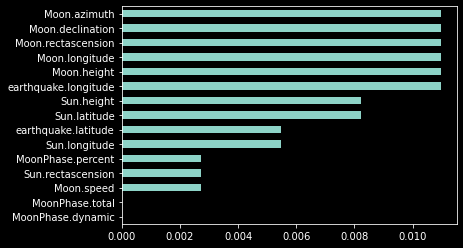

In [ ]:
# graph

df.head(15).importances_mean.plot(kind='barh')

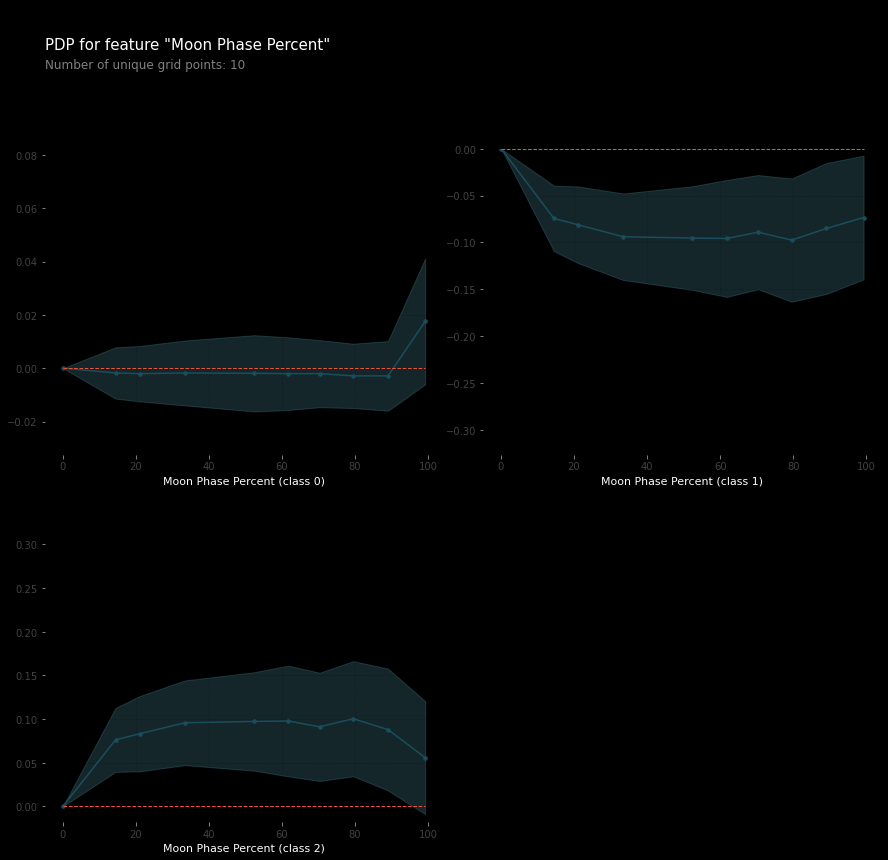

In [ ]:
# PDP plot of moon phase

feature = 'MoonPhase.percent'

isolated = pdp_isolate(
    model=model2,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name='Moon Phase Percent');

(<Figure size 1080x1224 with 7 Axes>,
 {'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f5e84274908>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5e874047f0>})

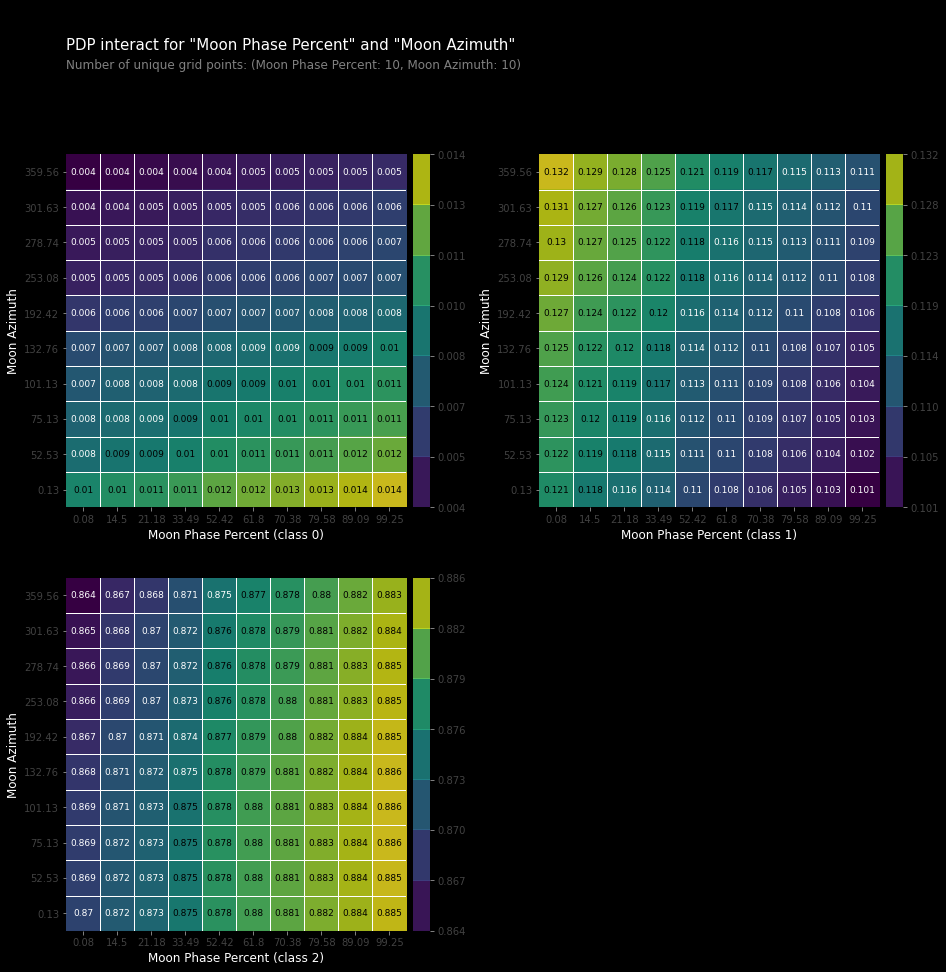

In [ ]:
# 2 feature pdp plot of moon phase and azimuth

features = ['MoonPhase.percent','Moon.azimuth'] # categorical and continous

interact = pdp_interact(
    model=model,
    dataset= X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interact, plot_type='grid', feature_names=['Moon Phase Percent','Moon Azimuth'])

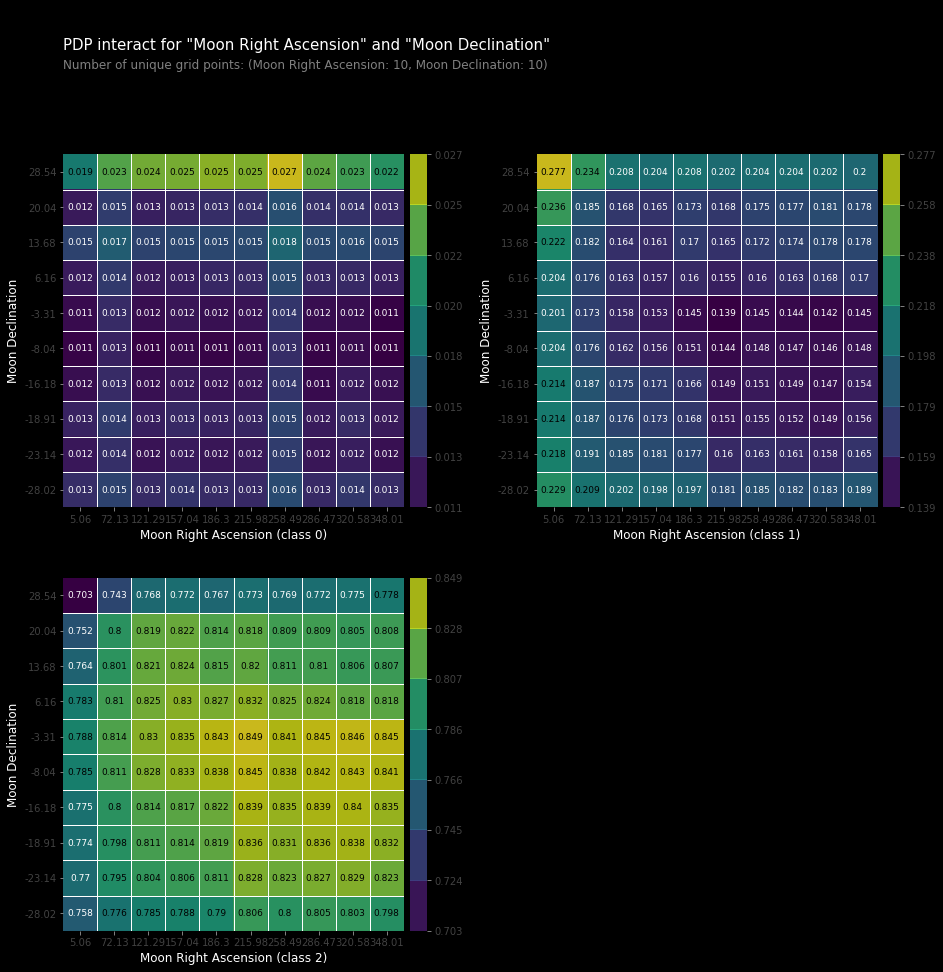

In [ ]:
# 2 feature plot- right ascension, declination

features = ['Moon.rectascension', 'Moon.declination']

interaction = pdp_interact(
    model=model2,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=['Moon Right Ascension', 'Moon Declination']);